In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
mobiledata=pd.read_excel('D:/practice project data set/linear -2/mobile sell data.xlsx')

In [3]:
mobiledata.head()

,Custmer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [4]:
mobiledata.tail()

,Custmer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
43195,43196,Friday,Chrome,31,3,13.4,9875.0
43196,43197,Monday,Chrome,13,4,8.5,2668.0
43197,43198,Friday,Firefox,29,10,32.9,15530.0
43198,43199,Monday,Internet Explorer,20,6,7.3,5215.0
43199,43200,Wednesday,Chrome,29,4,11.3,6627.0


In [5]:
mobiledata.shape

(43200, 7)

In [6]:
mobiledata.isnull().any()

  Custmer             False
Day                   False
Browser               False
No. of Clicks         False
Pages Viewed          False
Time (min)            False
Amount Spent (Rs.)    False
dtype: bool

In [7]:
mobiledata.describe()

,Custmer,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,21600.500000,23.740000,4.820000,12.810000,6812.820000
std,12470.910151,8.267647,2.016853,6.002444,3201.905731
min,1.000000,8.000000,2.000000,4.300000,1784.000000
25%,10800.750000,18.000000,3.000000,8.500000,4473.000000
50%,21600.500000,22.500000,4.500000,11.400000,6215.000000
75%,32400.250000,29.000000,6.000000,15.100000,8412.000000
max,43200.000000,46.000000,10.000000,32.900000,15851.000000


In [8]:
mobiledata['Day'].unique()

array(['Monday', 'Saturday', 'Friday', 'Sunday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [9]:
mobiledata['Day'].value_counts()#chek only by value count.

Friday       9504
Monday       7776
Saturday     6048
Tuesday      6048
Wednesday    5184
Sunday       4320
Thursday     4320
Name: Day, dtype: int64

In [10]:
mobile=mobiledata.sort_values(by=['Amount Spent (Rs.)'],ascending=False)
mobile

,Custmer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
17029,17030,Monday,Firefox,46,10,24.4,15851.0
6774,6775,Monday,Firefox,46,10,24.4,15851.0
19344,19345,Monday,Firefox,46,10,24.4,15851.0
6753,6754,Monday,Firefox,46,10,24.4,15851.0
2014,2015,Monday,Firefox,46,10,24.4,15851.0
...,...,...,...,...,...,...,...
41210,41211,Thursday,Chrome,11,2,8.1,1784.0
10551,10552,Thursday,Chrome,11,2,8.1,1784.0
21828,21829,Thursday,Chrome,11,2,8.1,1784.0
21831,21832,Thursday,Chrome,11,2,8.1,1784.0


In [11]:
US_state=mobiledata[['Browser','No. of Clicks','Pages Viewed','Amount Spent (Rs.)']].groupby('Browser').max()
US_state

,No. of Clicks,Pages Viewed,Amount Spent (Rs.)
Browser,,,
Chrome,42,7,12640.0
Firefox,46,10,15851.0
Internet Explorer,37,9,12025.0


In [12]:
corr=mobiledata.corr()
corr

,Custmer,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
Custmer,1.000000,0.002474,0.000821,-0.001407,0.002682
No. of Clicks,0.002474,1.000000,0.566934,0.516365,0.903248
Pages Viewed,0.000821,0.566934,1.000000,0.595568,0.723667
Time (min),-0.001407,0.516365,0.595568,1.000000,0.580048
Amount Spent (Rs.),0.002682,0.903248,0.723667,0.580048,1.000000


<AxesSubplot:>

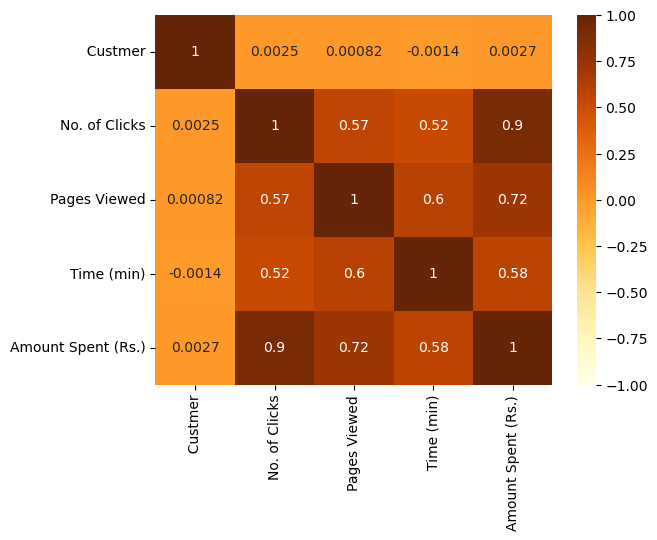

In [13]:
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='YlOrBr')

<AxesSubplot:xlabel='Day', ylabel='Amount Spent (Rs.)'>

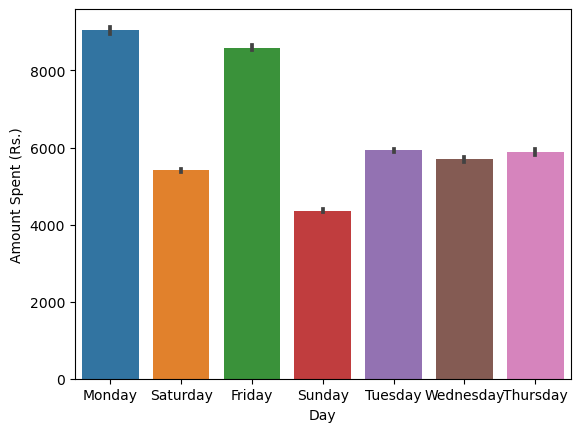

In [14]:
sns.barplot(x='Day',y='Amount Spent (Rs.)',data=mobiledata)

<AxesSubplot:xlabel='Day', ylabel='Amount Spent (Rs.)'>

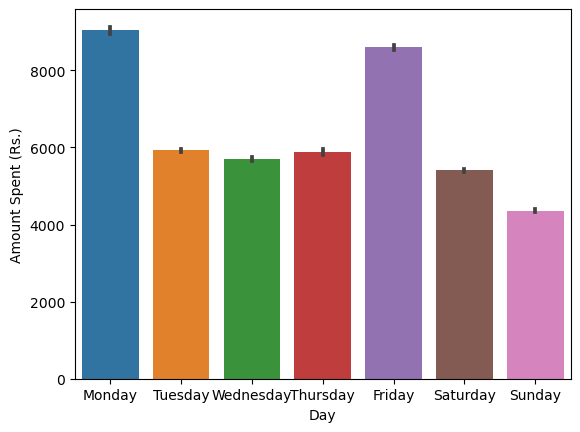

In [15]:
sns.barplot(x='Day',y='Amount Spent (Rs.)',data=mobiledata,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [16]:
mobiledata['Browser'].unique()

array(['Chrome', 'Internet Explorer', 'Firefox'], dtype=object)

In [17]:
mobiledata['Browser'].value_counts()

Chrome               23328
Firefox              13824
Internet Explorer     6048
Name: Browser, dtype: int64

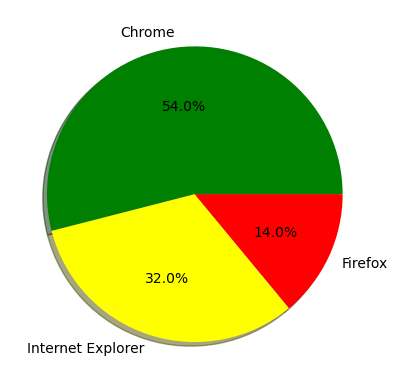

In [18]:
labels=['Chrome', 'Internet Explorer', 'Firefox']
values=mobiledata['Browser'].value_counts().values
fig, ax1=plt.subplots()
colors=['green','yellow','red']
ax1.pie(values,labels=labels,autopct='%1.1f%%',shadow=True,colors=colors)
plt.show()

<AxesSubplot:xlabel='Browser', ylabel='Amount Spent (Rs.)'>

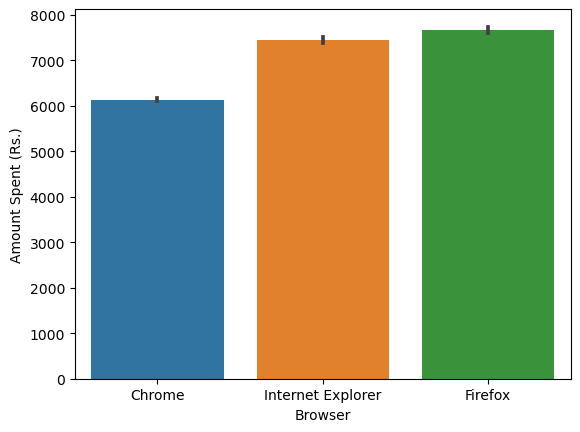

In [19]:
sns.barplot(x='Browser',y='Amount Spent (Rs.)',data=mobiledata)

In [20]:
#sns.barplot(x='Browser',y='No. of Clicks',data=mobiledata)

<AxesSubplot:xlabel='Browser', ylabel='Time (min)'>

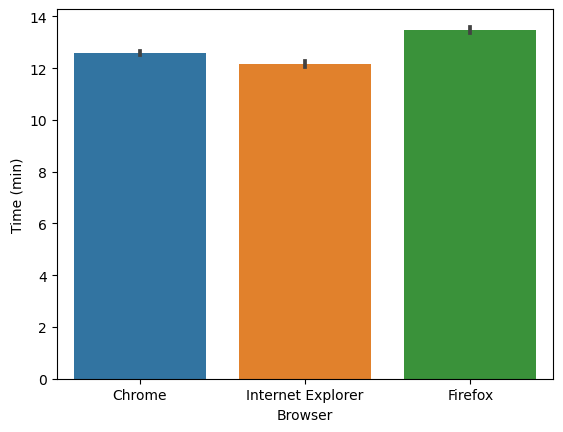

In [21]:
sns.barplot(x='Browser',y='Time (min)',data=mobiledata)

<AxesSubplot:ylabel='Amount Spent (Rs.)'>

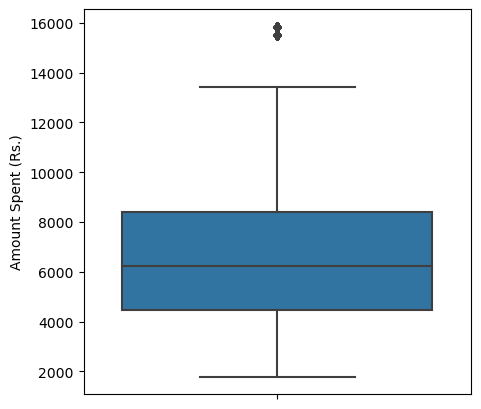

In [22]:
plt.figure(figsize=(5,5))
sns.boxplot(y=mobiledata['Amount Spent (Rs.)'])

<AxesSubplot:ylabel='No. of Clicks'>

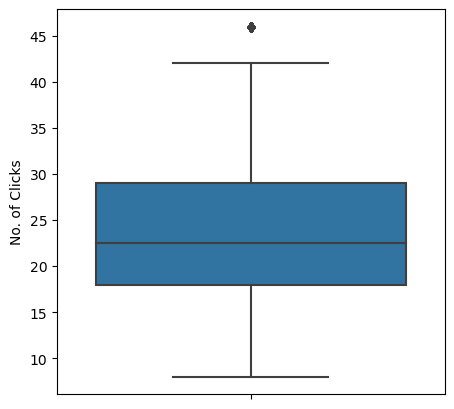

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(y=mobiledata['No. of Clicks'])

<AxesSubplot:ylabel='Pages Viewed'>

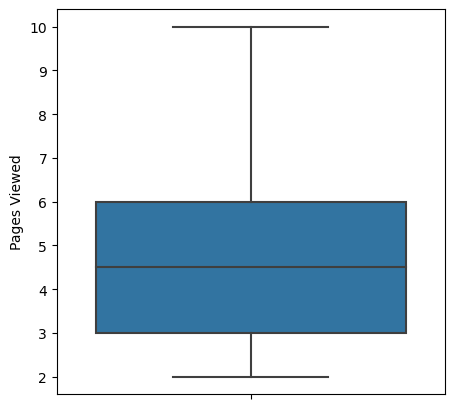

In [24]:
plt.figure(figsize=(5,5))
sns.boxplot(y=mobiledata['Pages Viewed'])

<AxesSubplot:ylabel='Time (min)'>

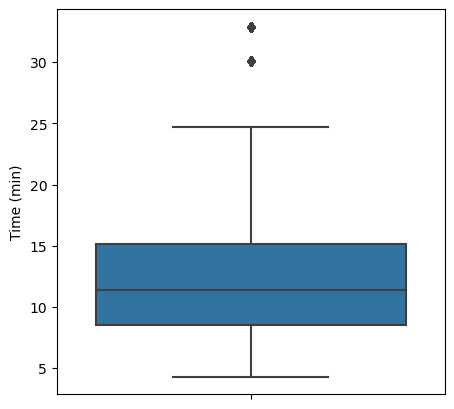

In [25]:
plt.figure(figsize=(5,5))
sns.boxplot(y=mobiledata['Time (min)'])

In [26]:
#sns.pairplot(mobiledata,hue='Time (min)')

In [27]:
max_thresold=mobiledata['Amount Spent (Rs.)'].quantile(0.999)
max_thresold

15851.0

In [28]:
min_thresold=mobiledata['Amount Spent (Rs.)'].quantile(0.005)
min_thresold

1784.0000000000005

In [29]:
new_mobiledata=mobiledata[(mobiledata['Amount Spent (Rs.)']<max_thresold)&(mobiledata['Amount Spent (Rs.)']>min_thresold)]
new_mobiledata

,Custmer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0
...,...,...,...,...,...,...,...
43195,43196,Friday,Chrome,31,3,13.4,9875.0
43196,43197,Monday,Chrome,13,4,8.5,2668.0
43197,43198,Friday,Firefox,29,10,32.9,15530.0
43198,43199,Monday,Internet Explorer,20,6,7.3,5215.0


In [30]:
new_mobiledata.shape

(41472, 7)

#BY LR

In [31]:
x=new_mobiledata.drop(['Amount Spent (Rs.)','Day','Browser'],axis=1)
y=new_mobiledata['Amount Spent (Rs.)']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=35)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lt=LinearRegression()
lt.fit(x_train,y_train)

LinearRegression()

In [36]:
y_predict=lt.predict(x_test)
x_test.head()

,Custmer,No. of Clicks,Pages Viewed,Time (min)
23757,23758,42,6,30.1
34010,34011,38,7,14.0
16344,16345,8,5,5.0
4554,4555,15,5,16.9
35942,35943,21,4,9.6


In [37]:
y_predict

array([12711.19513222, 11797.13440478,  2419.37313795, ...,
        9464.14725447,  3346.59741447,  3400.78529236])

In [38]:
y_test

23757    10423.0
34010    12640.0
16344     3648.0
4554      3469.0
35942     5920.0
          ...   
31453     4054.0
36944     5999.0
4454      9162.0
41473     3604.0
32246     2668.0
Name: Amount Spent (Rs.), Length: 11613, dtype: float64

In [39]:
accuracy=lt.score(x_test,y_test)
print(accuracy*100)

85.566199939868


#By svr

In [40]:
x=new_mobiledata.drop(['Amount Spent (Rs.)','Day','Browser'],axis=1)
y=new_mobiledata['Amount Spent (Rs.)']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=35)

In [43]:
from sklearn.svm import SVR

In [44]:
svr=SVR()

In [45]:
svr.fit(x_train,y_train)

SVR()

In [46]:
y_predict=svr.predict(x_test)
x_test.head()

,Custmer,No. of Clicks,Pages Viewed,Time (min)
23757,23758,42,6,30.1
34010,34011,38,7,14.0
16344,16345,8,5,5.0
4554,4555,15,5,16.9
35942,35943,21,4,9.6


In [47]:
y_predict

array([6015.71114525, 6020.23087815, 6014.09191761, ..., 6014.28317501,
       6014.29752376, 6014.52500238])

In [48]:
y_test

23757    10423.0
34010    12640.0
16344     3648.0
4554      3469.0
35942     5920.0
          ...   
6564      3273.0
42271     6873.0
5418      9162.0
7689      5596.0
19786     3469.0
Name: Amount Spent (Rs.), Length: 12442, dtype: float64

In [49]:
Accuracy=svr.score(x_test,y_test)
print(Accuracy*100)

-6.619103282786143


#DTC

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)